In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

# the directory where your data is
PATH_to_data = '/content/drive/My Drive/STROKE_code/MMPOSE/data/patient_output/v3/'
PATH_to_target = '/content/drive/My Drive/STROKE_code/MMPOSE/data/patient_output/target/STROKE_weak_side.xlsx'
PATH_to_process = '/content/drive/My Drive/STROKE_code/MMPOSE/data/patient_output/processed/'
import os
os.chdir(PATH_to_data)
import sys
sys.path.append(PATH_to_data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_files = []
for cur_path in os.listdir(PATH_to_data):
    # check if current path is a file
    if os.path.isfile(os.path.join(PATH_to_data, cur_path)):
        data_files.append(cur_path) #name[0]
print(data_files)

['DD_18_2_v3.csv', 'DD_18_v3.csv', 'BC_09_v3.csv', 'OM_17_v3.csv', 'PC_06_v3.csv', 'LH_24_v3.csv', 'ND_11_v3.csv', 'LC_19_v3.csv', 'GK_25_v3.csv', 'AF_10_2_v3.csv', 'RD_37_v3.csv', 'MS_05_2_v3.csv', 'AF_10_v3.csv', 'CA_21_v3.csv', 'GD_23_v3.csv', 'MS_05_v3.csv', 'MC_22_v3.csv', 'RO_26_v3.csv', 'VK_16_v3.csv', 'BD_7_v3.csv', 'IM_38_v3.csv', 'AT_08_v3.csv', 'AC_20_v3.csv', 'KE_35_v3.csv', 'AK_34_v3.csv']


In [ ]:
patients_ID = []
for patient_data in data_files:
    cur_ID = patient_data.split(".csv")[0]
    #remove version
    cur_ID = cur_ID.split("_")
    cur_ID = cur_ID[0] + '_' + cur_ID[1]
    patients_ID.append(cur_ID)
print(patients_ID)

In [ ]:
import pandas as pd
import numpy as np

# file_name = 'AK_34_v3.csv'
# FORMAT = '.csv'
# file_path = file_name #+ FORMAT

# create a dictionary with patient data, each key is a separate patient, but some patients have there recordings divided in 2 sections (different pose)
patients = {}
for file_name in data_files:    
    patients [file_name] = pd.read_csv(file_name, index_col=0)

In [ ]:
patients.keys()

In [ ]:
target = pd.read_excel(PATH_to_target)
target['patient_number'] = target['patient_number'].astype(int).astype(str)
# generate sting with patient number with 2 digits
target['patient_number'] = target['patient_number'].apply(lambda x: x.zfill(2) if len(x) == 1 else x)
target.head()

In [ ]:
target['patient_ID'] = target['patient_code'] + '_' + target['patient_number']
target['patient_ID'].unique()

In [ ]:
df_patients = pd.concat(patients, sort=False)

df_patients[['patient_code', 'patient_initials', 'extra']] = df_patients['patient'].str.split('_', expand=True)
df_patients['patient_ID'] = df_patients['patient_code'] + '_' + df_patients['patient_initials']
df_patients = df_patients.drop(columns=['extra','patient_code', 'patient_initials'])

df_patients['patient_ID'] = df_patients['patient_ID'].str.replace('BD_7', 'BD_07')
df_patients['patient_ID'].unique()

In [ ]:
df_patients = df_patients.set_index('patient_ID').join(target.set_index('patient_ID'))
# unset the 'date' column as the index
#df_patients = df_patients.reset_index(drop=False)

In [ ]:
df_patients['seconds'] = df_patients['frame'] % 60
df_patients = df_patients.drop(columns=['frame'])

# #check if you do not have any extras (60s, 61sts)
#df_patients['seconds'].value_counts() 

# #drop all rows where the value of the 'seconds' column is equal to 61 and 60
#df_patients = df_patients.drop(df_patients [df_patients['seconds'] == 61].index)
#df_patients = df_patients.drop(df_patients [df_patients['seconds'] == 60].index)
df_patients.head()

,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,...,day,hour,minute,if_nobody,if_multiple_people,patient_number,patient_code,Weakness on presentation,Weakness side,seconds
patient_ID,,,,,,,,,,,,,,,,,,,,,
AC_20,531.24866,665.69653,0.963227,482.26210,674.60315,0.953172,557.96857,652.33655,0.816213,446.63550,...,20210401,13,7,False,False,20,AC,Y,L,0
AC_20,531.67395,665.06460,0.964282,488.33563,678.06610,0.978745,557.67694,652.06310,0.842093,449.33112,...,20210401,13,7,False,False,20,AC,Y,L,1
AC_20,530.82800,668.03860,0.933524,484.64774,676.43506,0.921533,560.21533,651.24585,0.842028,446.86392,...,20210401,13,7,False,False,20,AC,Y,L,2
AC_20,447.69177,535.36755,0.792352,444.60443,528.16120,0.888338,392.01334,576.18567,0.393287,384.95215,...,20210401,13,7,False,True,20,AC,Y,L,3
AC_20,588.61660,622.23970,1.161708,542.77580,616.22350,1.159219,612.46390,612.01150,1.225980,530.52655,...,20210401,13,7,False,True,20,AC,Y,L,4


In [ ]:
len(df_patients)

1616238

In [ ]:
df_patients.dropna(subset=['day'], inplace=True)

unique_values = df_patients['day'].isna().sum()
print(unique_values)

nan_rows = df_patients[df_patients['day'].isna()]
print(nan_rows)

0
Empty DataFrame
Columns: [X1, Y1, Z1, X2, Y2, Z2, X3, Y3, Z3, X4, Y4, Z4, X5, Y5, Z5, X6, Y6, Z6, X7, Y7, Z7, X8, Y8, Z8, X9, Y9, Z9, X10, Y10, Z10, r_degr, l_degr, patient, day, hour, minute, if_nobody, if_multiple_people, patient_number, patient_code, Weakness on presentation, Weakness side, seconds]
Index: []

[0 rows x 43 columns]


In [ ]:
len(df_patients)

1616238

In [ ]:
df_patients['date'] = df_patients['day'].astype(int).astype(str) + ' ' + df_patients['hour'].astype(int).astype(str) + ':' + df_patients['minute'].astype(int).astype(str) + ':' + df_patients['seconds'].astype(int).astype(str)
df_patients.head(65)

,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,...,hour,minute,if_nobody,if_multiple_people,patient_number,patient_code,Weakness on presentation,Weakness side,seconds,date
patient_ID,,,,,,,,,,,,,,,,,,,,,
AC_20,531.24866,665.69653,0.963227,482.26210,674.60315,0.953172,557.96857,652.33655,0.816213,446.63550,...,13,7,False,False,20,AC,Y,L,0,20210401 13:7:0
AC_20,531.67395,665.06460,0.964282,488.33563,678.06610,0.978745,557.67694,652.06310,0.842093,449.33112,...,13,7,False,False,20,AC,Y,L,1,20210401 13:7:1
AC_20,530.82800,668.03860,0.933524,484.64774,676.43506,0.921533,560.21533,651.24585,0.842028,446.86392,...,13,7,False,False,20,AC,Y,L,2,20210401 13:7:2
AC_20,447.69177,535.36755,0.792352,444.60443,528.16120,0.888338,392.01334,576.18567,0.393287,384.95215,...,13,7,False,True,20,AC,Y,L,3,20210401 13:7:3
AC_20,588.61660,622.23970,1.161708,542.77580,616.22350,1.159219,612.46390,612.01150,1.225980,530.52655,...,13,7,False,True,20,AC,Y,L,4,20210401 13:7:4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC_20,589.34174,639.47577,0.938643,558.02490,658.26590,0.996891,595.60510,626.94904,0.568460,501.65454,...,13,7,False,False,20,AC,Y,L,0,20210401 13:7:0
AC_20,589.34174,639.47577,0.938643,558.02490,658.26590,0.996891,595.60510,626.94904,0.568460,501.65454,...,13,8,False,False,20,AC,Y,L,1,20210401 13:8:1
AC_20,375.40192,545.74970,0.780507,357.72357,548.58360,0.821373,421.71008,541.76240,0.783108,307.78770,...,13,8,False,True,20,AC,Y,L,2,20210401 13:8:2


In [ ]:
# convert the string date column to datetime format
df_patients['date'] = pd.to_datetime(df_patients['date'], format='%Y%m%d %H:%M:%S')

# display the modified dataframe
df_patients.head()
#print(df_patients.dtypes)

,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,...,hour,minute,if_nobody,if_multiple_people,patient_number,patient_code,Weakness on presentation,Weakness side,seconds,date
patient_ID,,,,,,,,,,,,,,,,,,,,,
AC_20,531.24866,665.69653,0.963227,482.26210,674.60315,0.953172,557.96857,652.33655,0.816213,446.63550,...,13,7,False,False,20,AC,Y,L,0,2021-04-01 13:07:00
AC_20,531.67395,665.06460,0.964282,488.33563,678.06610,0.978745,557.67694,652.06310,0.842093,449.33112,...,13,7,False,False,20,AC,Y,L,1,2021-04-01 13:07:01
AC_20,530.82800,668.03860,0.933524,484.64774,676.43506,0.921533,560.21533,651.24585,0.842028,446.86392,...,13,7,False,False,20,AC,Y,L,2,2021-04-01 13:07:02
AC_20,447.69177,535.36755,0.792352,444.60443,528.16120,0.888338,392.01334,576.18567,0.393287,384.95215,...,13,7,False,True,20,AC,Y,L,3,2021-04-01 13:07:03
AC_20,588.61660,622.23970,1.161708,542.77580,616.22350,1.159219,612.46390,612.01150,1.225980,530.52655,...,13,7,False,True,20,AC,Y,L,4,2021-04-01 13:07:04


In [ ]:
# release the 'patient_ID' column as the index of the dataframe
df_patients = df_patients.reset_index(drop=False)

# set the 'date' column as the index of the dataframe
df_patients.set_index('date', inplace=True)

In [ ]:
df_patients.head()

,patient_ID,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,...,day,hour,minute,if_nobody,if_multiple_people,patient_number,patient_code,Weakness on presentation,Weakness side,seconds
date,,,,,,,,,,,,,,,,,,,,,
2021-04-01 13:07:00,AC_20,531.24866,665.69653,0.963227,482.26210,674.60315,0.953172,557.96857,652.33655,0.816213,...,20210401,13,7,False,False,20,AC,Y,L,0
2021-04-01 13:07:01,AC_20,531.67395,665.06460,0.964282,488.33563,678.06610,0.978745,557.67694,652.06310,0.842093,...,20210401,13,7,False,False,20,AC,Y,L,1
2021-04-01 13:07:02,AC_20,530.82800,668.03860,0.933524,484.64774,676.43506,0.921533,560.21533,651.24585,0.842028,...,20210401,13,7,False,False,20,AC,Y,L,2
2021-04-01 13:07:03,AC_20,447.69177,535.36755,0.792352,444.60443,528.16120,0.888338,392.01334,576.18567,0.393287,...,20210401,13,7,False,True,20,AC,Y,L,3
2021-04-01 13:07:04,AC_20,588.61660,622.23970,1.161708,542.77580,616.22350,1.159219,612.46390,612.01150,1.225980,...,20210401,13,7,False,True,20,AC,Y,L,4


In [ ]:
df_patients['patient_ID'].unique()

In [ ]:
n_patients = len(df_patients['patient_ID'].unique())
print( 'We have {} patients'.format(n_patients) )

We have 22 patients


In [ ]:
# replace NaN/NA values in 'Weakness side' column with 'none'
df_patients['Weakness side'].fillna('none', inplace=True)

df_patients['Weakness side'].unique()

array(['L', 'none', 'R'], dtype=object)

In [ ]:
df_patients['Weakness side'].value_counts(normalize=True)

L       0.545067
R       0.338988
none    0.115945
Name: Weakness side, dtype: float64

In [ ]:
df_patients['Weakness side'].value_counts(normalize=False)

L       880958
R       547885
none    187395
Name: Weakness side, dtype: int64

In [ ]:



# remove rows where 'Weakness side' equals 'none'
df_patients = df_patients[df_patients['Weakness side'] != 'none']




In [ ]:
df_patients['Weakness side'].value_counts(normalize=True)

L    0.616553
R    0.383447
Name: Weakness side, dtype: float64

In [ ]:
df_patients['Weakness side'].value_counts(normalize=False)

L    880958
R    547885
Name: Weakness side, dtype: int64

In [ ]:
# select all rows related to specific patient using the 'patient_ID' index-column 
df_select = df_patients.loc[  df_patients['patient_ID'] == 'DD_18'].copy()

<Axes: title={'center': 'Signal vs. Time'}, xlabel='date'>

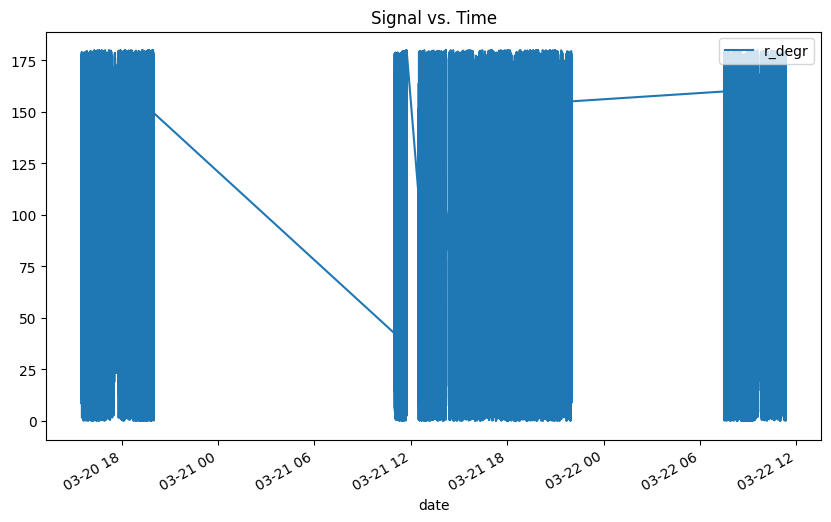

In [ ]:
test = df_select.copy(deep=True)
test = test.reset_index(drop=False)
test.plot(x = 'date', y='r_degr', figsize=(10, 6), title='Signal vs. Time')
#test.set_index('date', inplace=True)

In [ ]:
test.head()

,date,patient_ID,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,...,day,hour,minute,if_nobody,if_multiple_people,patient_number,patient_code,Weakness on presentation,Weakness side,seconds
0,2021-03-21 10:58:00,DD_18,1227.23900,5.934891,0.998995,1198.64930,-3.587006,0.812831,1309.93950,9.096905,...,20210321,10,58,False,True,18,DD,Y,L,0
1,2021-03-21 10:58:01,DD_18,1070.72410,261.227260,1.134227,1039.12880,244.924090,1.061694,1010.34863,83.122490,...,20210321,10,58,False,True,18,DD,Y,L,1
2,2021-03-21 10:58:02,DD_18,930.54803,140.096680,0.569893,950.29500,240.782440,0.590917,743.66580,22.463081,...,20210321,10,58,False,True,18,DD,Y,L,2
3,2021-03-21 10:58:03,DD_18,885.55945,398.559570,0.920691,865.87780,428.081900,0.958498,915.08190,388.718750,...,20210321,10,58,False,False,18,DD,Y,L,3
4,2021-03-21 10:58:04,DD_18,844.16120,427.588620,0.887528,780.08215,461.412500,1.046112,850.63960,341.680240,...,20210321,10,58,False,True,18,DD,Y,L,4


<Axes: title={'center': 'Signal vs. Time'}, xlabel='date'>

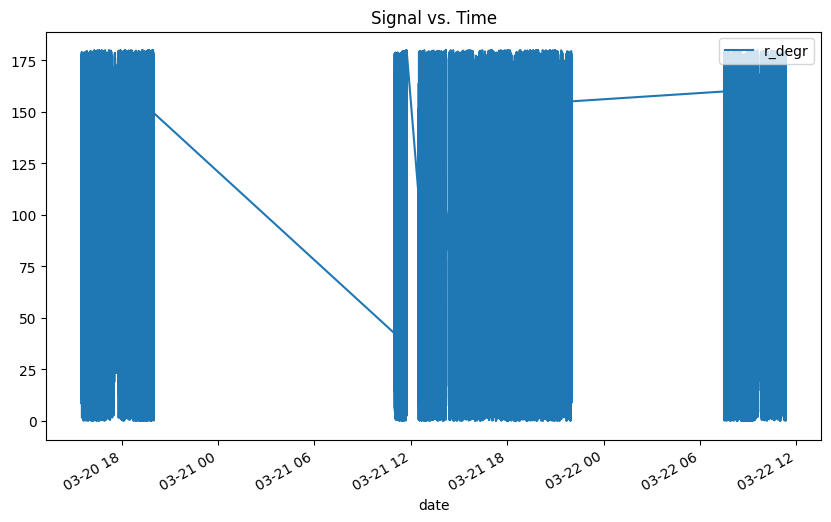

In [ ]:
# pandas.Series.between() function Using two dates
A = '2021-03-20 00:00'
B = '2021-03-23 23:00'
test2 = test.loc[ test[ "date" ].between(A, B) ]
len(test2)

test2.plot(x = 'date', y='r_degr', figsize=(10, 6), title='Signal vs. Time')

In [ ]:
test2.set_index('date', inplace=True)
test2.loc[ '2021-03-21 10:57:50' : '2021-03-21 10:58:20'].head()
#test2 = test2.reset_index(drop=False)

<ipython-input-113-f0de4316c929>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  test2.loc[ '2021-03-21 10:57:50' : '2021-03-21 10:58:20'].head()


,patient_ID,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,...,day,hour,minute,if_nobody,if_multiple_people,patient_number,patient_code,Weakness on presentation,Weakness side,seconds
date,,,,,,,,,,,,,,,,,,,,,
2021-03-21 10:58:00,DD_18,1227.23900,5.934891,0.998995,1198.64930,-3.587006,0.812831,1309.93950,9.096905,0.901282,...,20210321,10,58,False,True,18,DD,Y,L,0
2021-03-21 10:58:01,DD_18,1070.72410,261.227260,1.134227,1039.12880,244.924090,1.061694,1010.34863,83.122490,1.055472,...,20210321,10,58,False,True,18,DD,Y,L,1
2021-03-21 10:58:02,DD_18,930.54803,140.096680,0.569893,950.29500,240.782440,0.590917,743.66580,22.463081,0.379725,...,20210321,10,58,False,True,18,DD,Y,L,2
2021-03-21 10:58:03,DD_18,885.55945,398.559570,0.920691,865.87780,428.081900,0.958498,915.08190,388.718750,0.908819,...,20210321,10,58,False,False,18,DD,Y,L,3
2021-03-21 10:58:04,DD_18,844.16120,427.588620,0.887528,780.08215,461.412500,1.046112,850.63960,341.680240,0.729943,...,20210321,10,58,False,True,18,DD,Y,L,4


In [ ]:
del test
del test2
del df_select

In [ ]:
df_patients[['r_degr','l_degr']].head()

,r_degr,l_degr
date,,
2021-04-01 13:07:00,96.632530,19.230654
2021-04-01 13:07:01,75.806830,25.560034
2021-04-01 13:07:02,81.384380,19.885174
2021-04-01 13:07:03,106.368515,132.237300
2021-04-01 13:07:04,35.071747,56.615230


In [ ]:
# this block should work ONLY if you work with old data
# do NOT run this block if you have recorded newly aquired data
# we had a mistake: we confused left and right angle at the preprocessing phase (it was adjusted in the last version)
df_patients = df_patients.rename(columns={'r_degr': 'l_degr', 'l_degr': 'r_degr'})
df_patients[['r_degr','l_degr']].head()

,r_degr,l_degr
date,,
2021-04-01 13:07:00,19.230654,96.632530
2021-04-01 13:07:01,25.560034,75.806830
2021-04-01 13:07:02,19.885174,81.384380
2021-04-01 13:07:03,132.237300,106.368515
2021-04-01 13:07:04,56.615230,35.071747


In [ ]:
def highlight_fragments(dataframe, allowed_missing_seconds, if_message):
    # allowed_missing_seconds: if a difference between timedate in "time_diff" column for consequent frames is bigger, we consider the next frame to be the new fragment
    
    dataframe['time_diff'] = abs(dataframe['date'].diff() )
    dataframe['fragment']  = (dataframe['time_diff'] >= pd.Timedelta(seconds = allowed_missing_seconds) ).cumsum()
    dataframe = dataframe.drop( columns=['time_diff'] )

    if(if_message):
        print('The number of separated fragments: ', len(dataframe['fragment'].unique()))

    return dataframe

In [ ]:
df_patients = df_patients.reset_index(drop=False)
df_patients = highlight_fragments( df_patients, 300, if_message=True)
#df_patients.head()

The number of separated fragments:  93


In [ ]:
len(df_patients)

1428843

In [ ]:
# Calculate the number of occurrences of each class in the "fragment" column and print them out
fragment_counts = df_patients['fragment'].value_counts()
print( fragment_counts.sort_values() )

80       61
78      671
49      960
79     1098
37     1220
      ...  
1     47566
92    50506
24    50924
87    56998
4     60541
Name: fragment, Length: 93, dtype: int64


In [ ]:
fragments_to_remove = fragment_counts[fragment_counts < 1000].index.tolist()

In [ ]:
df_patients = df_patients.loc[~df_patients['fragment'].isin(fragments_to_remove)]
len(df_patients)

1427151

In [ ]:
print('The new number of separated fragments: ', len(df_patients['fragment'].unique()))

The new number of separated fragments:  90


In [ ]:
#fragment_counts = fragment_counts[fragment_counts > 1000]
fragment_counts = df_patients['fragment'].value_counts()
print( fragment_counts.sort_values() )

79     1098
37     1220
77     1281
6      1641
35     1891
      ...  
1     47566
92    50506
24    50924
87    56998
4     60541
Name: fragment, Length: 90, dtype: int64


In [ ]:
# group the dataframe by "fragment" and count the number of unique values in "weakness"
fragment_weakness_counts = df_patients.groupby('fragment')['Weakness side'].nunique()
##fragment_weakness_counts.to_csv('fragments.txt', sep='\t', header=True, index=True)

# filter the dataframe to include only fragments with more than 1 unique value of weakness
fragments_with_multiple_weakness = fragment_weakness_counts[fragment_weakness_counts > 1].index.tolist()

print(fragments_with_multiple_weakness)

[]


In [ ]:
# Define a custom function to cut each class to be a multiple of 1000
def cut_to_multiple_of_1000(df):
    return df.iloc[:len(df) // 1000 * 1000]

# Group the dataframe by "class" and apply the custom function to each group
df_cut = df_patients.groupby('fragment').apply(cut_to_multiple_of_1000).reset_index(drop=True)

In [ ]:
# Calculate the number of occurrences of each class in the "fragment" column and print them out
fragment_counts = df_cut['fragment'].value_counts()
print( fragment_counts.sort_values() )

6      1000
35     1000
37     1000
79     1000
77     1000
      ...  
1     47000
24    50000
92    50000
87    56000
4     60000
Name: fragment, Length: 90, dtype: int64


In [ ]:
fragment_counts[76]

3000

In [ ]:
df_cut['Weakness side'].value_counts(normalize=True)

L    0.6126
R    0.3874
Name: Weakness side, dtype: float64

In [ ]:
df_cut['Weakness side'].value_counts(normalize=False)

L    846000
R    535000
Name: Weakness side, dtype: int64

In [ ]:
num_columns = df_cut.shape[1]

print(f"The DataFrame has {num_columns} columns.")

The DataFrame has 46 columns.


In [ ]:
#df_cut[ df_cut['fragment'] == 76 ].to_excel('problem.xlsx', index=True, header=True)
#print(df_cut)

In [ ]:
len(df_cut)

1381000

In [ ]:
df_cut['Weakness side'].unique()

array(['L', 'R'], dtype=object)

In [ ]:
# Calculate the number of occurrences of each class in the "fragment" column and print them out
fragment_counts = df_cut['fragment'].value_counts()
print( fragment_counts.sort_values() )

6      1000
35     1000
37     1000
79     1000
77     1000
      ...  
1     47000
24    50000
92    50000
87    56000
4     60000
Name: fragment, Length: 90, dtype: int64


In [ ]:
#fragment_counts.to_excel("problem_series.xlsx") 

In [ ]:
df_select = df_cut.loc[:, ~df_cut.columns.isin(['patient_ID', 'patient', 'day', 'hour', 'minute', 'if_nobody', 'if_multiple_people', 'patient_number', 'patient_code', 'Weakness on presentation',  'seconds', 'time_diff'])]
print(df_select.columns.to_list()) #- date
del df_cut
del df_patients

['date', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6', 'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10', 'Z10', 'l_degr', 'r_degr', 'Weakness side', 'fragment']


In [ ]:
X = df_select.loc[:, ~df_select.columns.isin([ 'Weakness side', 'fragment' ])]  
print(X.columns.to_list())

['date', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6', 'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10', 'Z10', 'l_degr', 'r_degr']


In [ ]:
Y = df_select[ ['date', 'Weakness side'] ] # - date
Y.head()

,date,Weakness side
0,2021-04-01 13:07:00,L
1,2021-04-01 13:07:01,L
2,2021-04-01 13:07:02,L
3,2021-04-01 13:07:03,L
4,2021-04-01 13:07:04,L


In [ ]:
X.head()

,date,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,...,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,l_degr,r_degr
0,2021-04-01 13:07:00,531.24866,665.69653,0.963227,482.26210,674.60315,0.953172,557.96857,652.33655,0.816213,...,866.09595,0.612627,716.06146,676.82983,0.031005,388.74237,830.46936,0.839219,96.632530,19.230654
1,2021-04-01 13:07:01,531.67395,665.06460,0.964282,488.33563,678.06610,0.978745,557.67694,652.06310,0.842093,...,860.08704,0.662388,687.69190,777.74414,0.051144,392.99133,829.75024,0.847826,75.806830,25.560034
2,2021-04-01 13:07:02,530.82800,668.03860,0.933524,484.64774,676.43506,0.921533,560.21533,651.24585,0.842028,...,873.75050,0.598701,692.45874,812.87660,0.066539,388.08908,835.96670,0.851638,81.384380,19.885174
3,2021-04-01 13:07:03,447.69177,535.36755,0.792352,444.60443,528.16120,0.888338,392.01334,576.18567,0.393287,...,608.10660,1.031241,687.16660,677.63790,0.564126,497.31384,550.26250,0.827305,106.368515,132.237300
4,2021-04-01 13:07:04,588.61660,622.23970,1.161708,542.77580,616.22350,1.159219,612.46390,612.01150,1.225980,...,898.59930,1.053172,805.16600,674.86430,1.321182,516.75790,890.26447,0.905123,35.071747,56.615230


In [ ]:
def calculate_angle_single (a,c,b):  
    
    ac  = pow (pow(c[0]-a[0], 2) + pow(c[1]-a[1], 2),    (1/2) )    # a->c   ((a[x]-c[x] )^2  + (a[y]-c[y] )^2)^(1/2) 
    #x
    print ('c[x] = {}, a[x] = {}'.format(c[0], a[0])  )
    print ('c[x] - a[x] = {}'.format(c[0]-a[0])  )
    print ('(c[x] - a[x])^2 = {}'.format(pow(c[0]-a[0],2))  )
    #y
    print ('c[y] = {}, a[y] = {}'.format(c[1], a[1])  )
    print ('c[y] - a[y] = {}'.format(c[1]-a[1])  )
    print ('(c[y] - a[y])^2 = {}'.format(pow(c[1]-a[1],2))  )
    #pow 1/2
    print ('( (c[x] - a[x])^2 + (c[y] - a[y])^2) )^ 1/2 = {}'.format (pow (pow(c[0]-a[0], 2) + pow(c[1]-a[1], 2),    (1/2) )) )
    if ac==0: ac = 0.000000001
    print ('============================')

    bc  = pow (pow(c[0]-b[0], 2) + pow(c[1]-b[1], 2),    (1/2) )    # b->c   ((b[x]-c[x] )^2  + (b[y]-c[y] )^2)^(1/2) 
    #x
    print ('c[x] = {}, b[x] = {}'.format(c[0], b[0])  )
    print ('c[x] - b[x] = {}'.format(c[0]-b[0])  )
    print ('(c[x] - b[x])^2 = {}'.format(pow(c[0]-b[0],2))  )
    #y
    print ('c[y] = {}, b[y] = {}'.format(c[1], b[1])  )
    print ('c[y] - b[y] = {}'.format(c[1]-b[1])  )
    print ('(c[y] - b[y])^2 = {}'.format(pow(c[1]-b[1],2))  )
    #pow 1/2
    print ('( (c[x] - b[x])^2 + (c[y] - b[y])^2) )^ 1/2 = {}'.format (pow (pow(c[0]-b[0], 2) + pow(c[1]-b[1], 2),    (1/2) )) )
    if bc==0: bc = 0.000000001
    print ('============================')



    ab  = pow (pow(b[0]-a[0],2)  + pow(b[1]-a[1],2),    (1/2) )       # a->b   ((a[x]-b[x])^2  + (a[y]-b[y])^2)^(1/2) 

    #x
    print ('b[x] = {}, a[x] = {}'.format(b[0], a[0])  )
    print ('b[x] - a[x] = {}'.format(b[0]-a[0])  )
    print ('(b[x] - a[x])^2 = {}'.format(pow(b[0]-a[0],2))  )
    #y
    print ('b[y] = {}, a[y] = {}'.format(b[1], a[1])  )
    print ('b[y] - a[y] = {}'.format(b[1]-a[1])  )
    print ('(b[y] - a[y])^2 = {}'.format(pow(b[1]-a[1],2))  )
    if ab==0: ab = 0.000000001
    print ('============================')

    cos = (pow(bc,2) +pow(ac,2) -pow(ab,2)) / (bc*ac*2)

    
    print ('bc = {}'.format(bc) )
    print ('bc^2 = {}'.format(pow(bc,2)) )
    print ('---')
    print ('ac = {}'.format(ac) )
    print ('ac^2 = {}'.format(pow(ac,2)) )
    print ('---')
    print ('ab = {}'.format(ab) )
    print ('ab^2 = {}'.format(pow(ab,2)) )
    print ('---')
    print ('bc^2 +ac^2 -ab^2 = {}'.format( pow(bc,2) +pow(ac,2) -pow(ab,2) ) )
    print ('2*bc*ac = {}'.format( bc*ac*2 ) )
    print ('---')

    print ('(bc^2 +ac^2 -ab^2) / (2*bc*ac ) = {}'.format( (pow(bc,2) +pow(ac,2) -pow(ab,2)) / (bc*ac*2) ) )


    print ('cos alpha = ( (c[x] - b[x])^2 + (c[y] - b[y])^2) )^ 1/2 = {}'.format (pow (pow(c[0]-b[0], 2) + pow(c[1]-b[1], 2),    (1/2) )) )
    print ('============================')
    
    angle_radian =  np.arccos( cos )
    angle_degrees = np.degrees( angle_radian )
    
    print("radians = ", angle_radian)
    print("angle alpha (degrees) = arc-cos ({}) = {}".format(cos, angle_degrees) )

a =  [615.78076, 713.48706] 
#[415.46228, 736.94960] 
#[421.62982, 731.97766]

c =  [729.03546, 697.30774] 
#[353.11578, 866.09595] 
#[310.68646, 870.65686]

b =  [729.03546, 697.30774] 
#[388.74237, 830.46936] 
#[389.27136, 792.07190]

calculate_angle_single  ( a, c, b )

c[x] = 729.03546, a[x] = 615.78076
c[x] - a[x] = 113.25469999999996
(c[x] - a[x])^2 = 12826.62707208999
c[y] = 697.30774, a[y] = 713.48706
c[y] - a[y] = -16.179320000000075
(c[y] - a[y])^2 = 261.77039566240245
( (c[x] - a[x])^2 + (c[y] - a[y])^2) )^ 1/2 = 114.4045342971702
c[x] = 729.03546, b[x] = 729.03546
c[x] - b[x] = 0.0
(c[x] - b[x])^2 = 0.0
c[y] = 697.30774, b[y] = 697.30774
c[y] - b[y] = 0.0
(c[y] - b[y])^2 = 0.0
( (c[x] - b[x])^2 + (c[y] - b[y])^2) )^ 1/2 = 0.0
b[x] = 729.03546, a[x] = 615.78076
b[x] - a[x] = 113.25469999999996
(b[x] - a[x])^2 = 12826.62707208999
b[y] = 697.30774, a[y] = 713.48706
b[y] - a[y] = -16.179320000000075
(b[y] - a[y])^2 = 261.77039566240245
bc = 1e-09
bc^2 = 1e-18
---
ac = 114.4045342971702
ac^2 = 13088.397467752393
---
ab = 114.4045342971702
ab^2 = 13088.397467752393
---
bc^2 +ac^2 -ab^2 = 0.0
2*bc*ac = 2.2880906859434042e-07
---
(bc^2 +ac^2 -ab^2) / (2*bc*ac ) = 0.0
cos alpha = ( (c[x] - b[x])^2 + (c[y] - b[y])^2) )^ 1/2 = 0.0
radians =  1.570796326

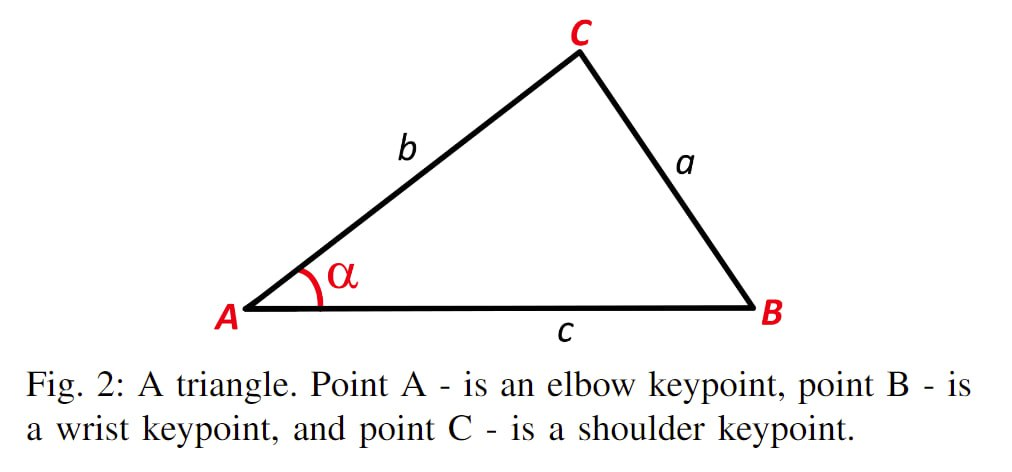

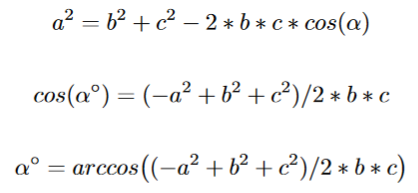

In [ ]:
def calculate_angle(p0,c,p1, output=False):
    # Input: point_0, point_1 and central point are pandas Series
    if (p0[0].shape == p1[0].shape) and (p0[0].shape == c[0].shape):     
        
        p0c  = (c[0].sub(p0[0] ).pow(2) + c[1].sub(p0[1] ).pow(2) ).pow(1/2)    # p0->c   ((p0[x]-c[x] )^2  + (p0[y]-c[y] )^2)^(1/2) 
        p1c  = (c[0].sub(p1[0] ).pow(2) + c[1].sub(p1[1] ).pow(2) ).pow(1/2)    # p1->c   ((p1[x]-c[x] )^2  + (p1[y]-c[y] )^2)^(1/2) 
        p0p1 = (p1[0].sub(p0[0]).pow(2) + p1[1].sub(p0[1]).pow(2) ).pow(1/2)    # p0->p1  ((p0[x]-p1[x])^2  + (p0[y]-p1[y])^2)^(1/2) 
        
        cos = (p1c.pow(2) + p0c.pow(2) - p0p1.pow(2)).div(p1c.mul(p0c).mul(2))

        angle_radian =  np.arccos( cos )
        angle_degrees = np.degrees( angle_radian )

        if output:
            print("Radians = ", angle_radian)
            print("Degrees = ", angle_degrees)

        # Output: radians, degress.
        return angle_radian, angle_degrees
    else:
        raise ValueError ("Input series' shapes mismatch")

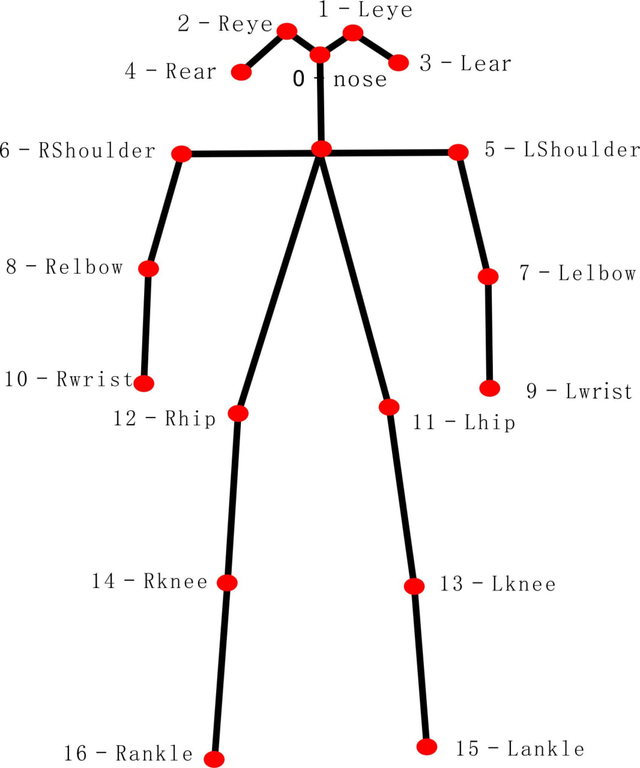

In [ ]:
 # Form a triplet [p0(x,y), c(x,y), p1(x,y)]

left_shoulder  = X [ ['X5','Y5'] ]  # WRONG! it should be X and Y
right_shoulder = X [ ['X6','Y6'] ]  # WRONG!
left_elbow     = X [ ['X7','Y7'] ]  # WRONG!
right_elbow    = X [ ['X8','Y8'] ]  # WRONG!

tls = right_shoulder,left_shoulder, left_elbow  #triplet_left_shoulder
trs = left_shoulder,right_shoulder, right_elbow #triplet_right_shoulder

p0 = [ tls[0].iloc[:,0],  tls[0].iloc[:,1] ]
c  = [ tls[1].iloc[:,0],  tls[1].iloc[:,1] ]
p1 = [ tls[2].iloc[:,0],  tls[2].iloc[:,1] ]
tls_degrees = calculate_angle(p0,c,p1, output=False) [1]

p0 = [ trs[0].iloc[:,0],  trs[0].iloc[:,1] ]
c  = [ trs[1].iloc[:,0],  trs[1].iloc[:,1] ]
p1 = [ trs[2].iloc[:,0],  trs[2].iloc[:,1] ]
trs_degrees = calculate_angle(p0,c,p1, output=False) [1]

del p0
del c
del p1

del left_shoulder  
del right_shoulder 
del left_elbow     
del right_elbow  


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
tls_degrees.isna().sum()

1506

In [ ]:
trs_degrees.isna().sum()

1521

In [ ]:
 # Using DataFrame.insert() to add a column
 X.insert(loc=len(X.columns), column="l_shoulder", value=tls_degrees, allow_duplicates=False) 
 X.insert(loc=len(X.columns), column="r_shoulder", value=trs_degrees, allow_duplicates=False) 


In [ ]:
from sklearn.model_selection import train_test_split
# Split the DataFrame into train and test subsets
cur_test_size = 0.3 #30%

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=cur_test_size, shuffle=False, stratify=None, random_state=None) 

print('X Train shape:', X_train.shape)
print('X Test shape:', X_test.shape)

print('Y Train shape:',  Y_train.shape)
print('Y Test shape:',   Y_test.shape)

X Train shape: (966700, 35)
X Test shape: (414300, 35)
Y Train shape: (966700, 2)
Y Test shape: (414300, 2)


In [ ]:
X_train = highlight_fragments( X_train, 300, if_message=True)
X_test  = highlight_fragments( X_test , 300, if_message=True)
#
Y_train = highlight_fragments( Y_train, 300, if_message=True)
Y_test  = highlight_fragments( Y_test , 300, if_message=True)

# Group the dataframe by "fragment" and apply the custom function to each group
X_train = X_train.groupby('fragment').apply(cut_to_multiple_of_1000).reset_index(drop=True)
X_test  = X_test.groupby ('fragment').apply(cut_to_multiple_of_1000).reset_index(drop=True)
#
Y_train = Y_train.groupby('fragment').apply(cut_to_multiple_of_1000).reset_index(drop=True)
Y_test  = Y_test.groupby ('fragment').apply(cut_to_multiple_of_1000).reset_index(drop=True)

# Calculate the number of occurrences of each class in the "fragment" column 
fragment_counts_TRAIN = X_train['fragment'].value_counts()
fragment_counts_TEST  = X_test ['fragment'].value_counts()

'''
# save the Series to a text file
fragment_counts_TRAIN.to_csv('aaa_train.txt', index=False, header=False)
fragment_counts_TEST .to_csv('aaa_test.txt', index=False, header=False)
'''

The number of separated fragments:  55
The number of separated fragments:  36
The number of separated fragments:  55
The number of separated fragments:  36


"\n# save the Series to a text file\nfragment_counts_TRAIN.to_csv('aaa_train.txt', index=False, header=False)\nfragment_counts_TEST .to_csv('aaa_test.txt', index=False, header=False)\n"

In [ ]:
X_train = X_train.drop('date', axis=1)
X_test = X_test.drop('date', axis=1)

X_train = X_train.drop('fragment', axis=1)
X_test = X_test.drop('fragment', axis=1)
X_test.head()

,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,...,X9,Y9,Z9,X10,Y10,Z10,l_degr,r_degr,l_shoulder,r_shoulder
0,1000.63440,380.98325,0.868168,988.7250,375.02847,0.826602,1042.3176,380.98325,0.869758,1024.45340,...,1066.13660,619.17285,0.877306,869.63010,535.80650,0.849639,177.13747,152.488110,102.392732,114.034351
1,973.33215,351.58420,0.908326,954.5896,345.33670,0.900577,1017.0647,357.83170,0.888944,948.34204,...,948.34204,507.77194,0.719612,898.36206,482.78183,0.318947,69.77513,108.434390,100.049438,100.175541
2,999.76227,353.07126,0.902569,981.5997,347.01700,0.920868,1030.0334,359.12546,0.974153,963.43695,...,987.65390,516.53516,0.819041,896.84064,480.20980,0.737803,65.55601,22.166405,103.392516,107.571218
3,992.90393,347.22836,0.937324,967.7980,340.95187,0.898860,1024.2864,347.22836,0.951995,948.96850,...,980.35095,510.41696,0.841974,892.48010,479.03452,0.551481,63.43493,7.124831,98.972626,107.592378
4,996.80010,346.99280,0.936397,965.9156,340.81592,0.959989,1021.5076,346.99280,0.949036,953.56180,...,978.26935,519.94580,0.845404,897.96980,476.70752,0.695185,79.69517,6.009130,101.309941,99.246119


In [ ]:
print(len(X_test))
print(len(X_train))

414000
966000


In [ ]:
Y_train = Y_train.drop('date', axis=1)
Y_train = Y_train.drop('fragment', axis=1)

Y_test = Y_test.drop('date', axis=1)
Y_test = Y_test.drop('fragment', axis=1)
Y_test.head()

,Weakness side
0,L
1,L
2,L
3,L
4,L


In [ ]:
print('X Train shape:', X_train.shape)
print('X Test shape:', X_test.shape)

print('Y Train shape:',  Y_train.shape)
print('Y Test shape:',   Y_test.shape)

X Train shape: (966000, 34)
X Test shape: (414000, 34)
Y Train shape: (966000, 1)
Y Test shape: (414000, 1)


In [ ]:
os.chdir(PATH_to_process)

In [ ]:

# Save the array as a .csv file
X_test.to_csv('X_test2.csv', index=False)
X_train.to_csv('X_train2.csv', index=False)
Y_test.to_csv('Y_test2.csv', index=False)
Y_train.to_csv('Y_train2.csv', index=False)
